In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Defining key functions for image registration and inpainting missing values. These functions include:
#### *findHomographyAndWarp: Computes the homography between two images and warps the moving image to align with the reference image.*
#### *inpaintMissingValues: Inpaints missing values (black pixels) in an image to improve its visual quality.*

In [2]:
def findHomographyAndWarp(referenceImage, movingImage, keypoints1, keypoints2, matches, numMatchesToDraw=50):
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt
    homography, mask = cv.findHomography(points2, points1, cv.RANSAC)
    height, width = referenceImage.shape[:2]
    warpedImage = cv.warpPerspective(movingImage, homography, (width, height))
    
    return warpedImage, homography
def inpaintMissingValues(image):
    if len(image.shape) == 3:
        grayImage = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    else:
        grayImage = image
    mask = grayImage == 0
    inpaintedImage = cv.inpaint(image, mask.astype(np.uint8), inpaintRadius=3, flags=cv.INPAINT_TELEA)
    
    return inpaintedImage


## Loading and displaying the reference and moving images.

#### *This involves reading the images and displaying them side by side using matplotlib.*

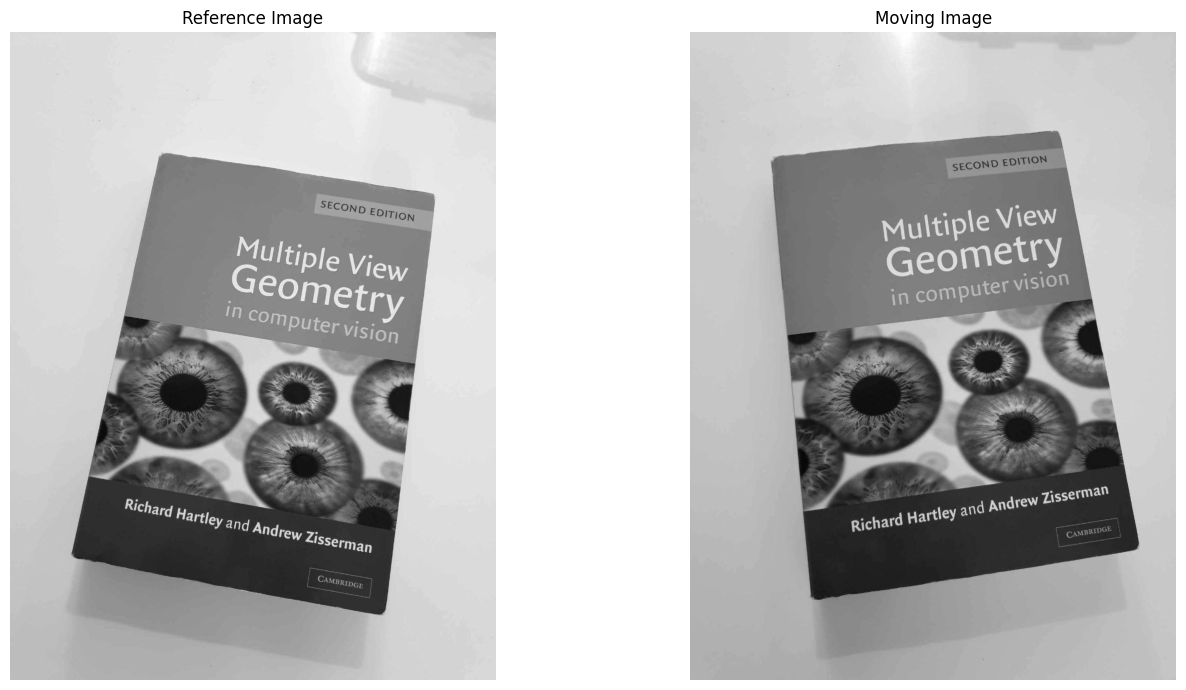

In [3]:
referenceImage=cv.imread('book1.jpg',0)
movingImage=cv.imread('book2.jpg',0)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(referenceImage, cmap='gray')
plt.title('Reference Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(movingImage, cmap='gray')
plt.title('Moving Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Detecting keypoints and computing descriptors using the ORB detector.

#### *This involves detecting keypoints in both images and drawing them for visualization.*

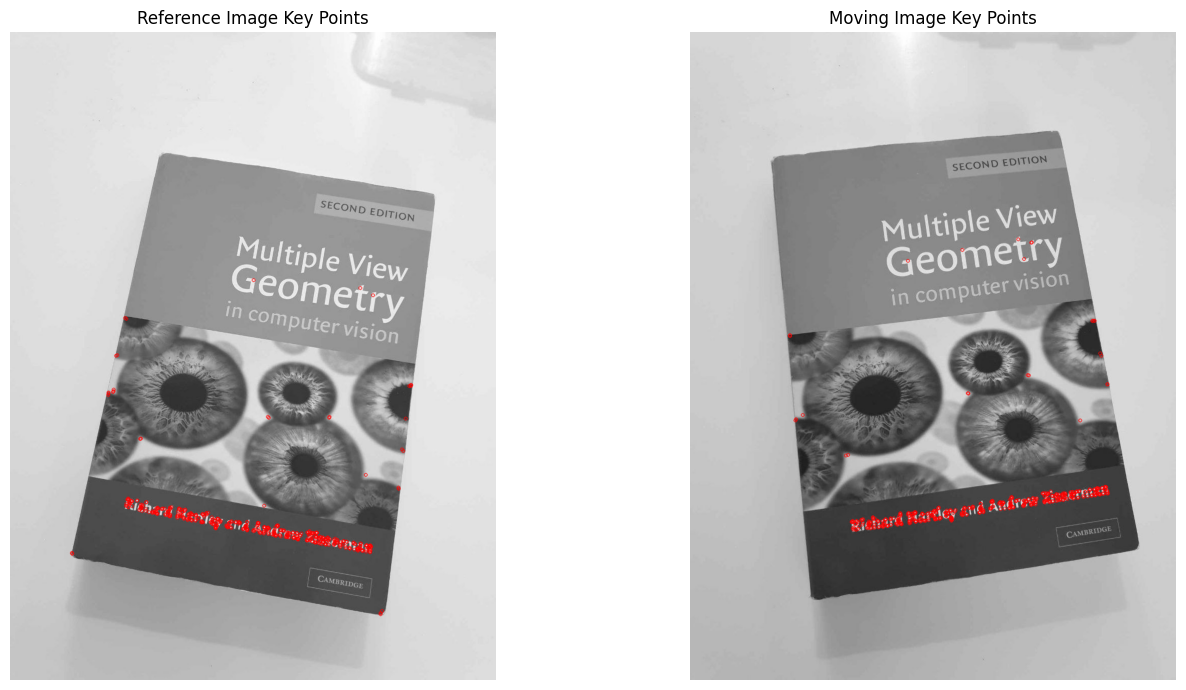

In [4]:
orb = cv.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(referenceImage, None)
keypoints2, descriptors2 = orb.detectAndCompute(movingImage, None)
referenceImageWithKeypoints = cv.drawKeypoints(referenceImage, keypoints1, None, color=(255, 0, 0), flags=0)
movingImageWithKeypoints = cv.drawKeypoints(movingImage, keypoints2, None, color=(255, 0, 0), flags=0)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(referenceImageWithKeypoints, cmap='gray')
plt.title('Reference Image Key Points')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(movingImageWithKeypoints, cmap='gray')
plt.title('Moving Image Key Points')
plt.axis('off')
plt.tight_layout()
plt.show()


## Matching keypoints between the reference and moving images using the BFMatcher.

#### *This involves finding the top matches and visualizing them.*

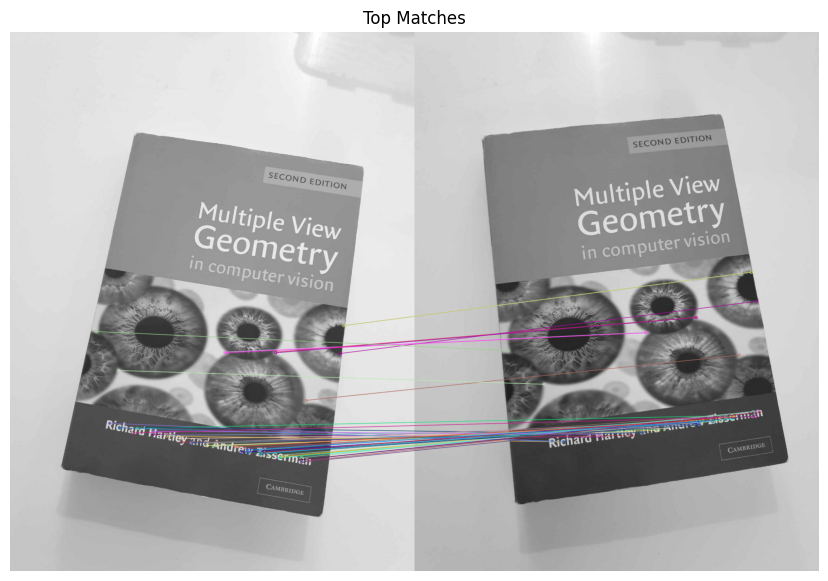

In [5]:
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)
numMatchesToDraw = 50
matchingResult = cv.drawMatches(referenceImage, keypoints1, movingImage, keypoints2, matches[:numMatchesToDraw], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15, 7))
plt.imshow(matchingResult)
plt.title('Top Matches')
plt.axis('off')
plt.show()


## Warping the moving image to align with the reference image using the computed homography.

#### *This involves computing the homography and displaying the warped image.*

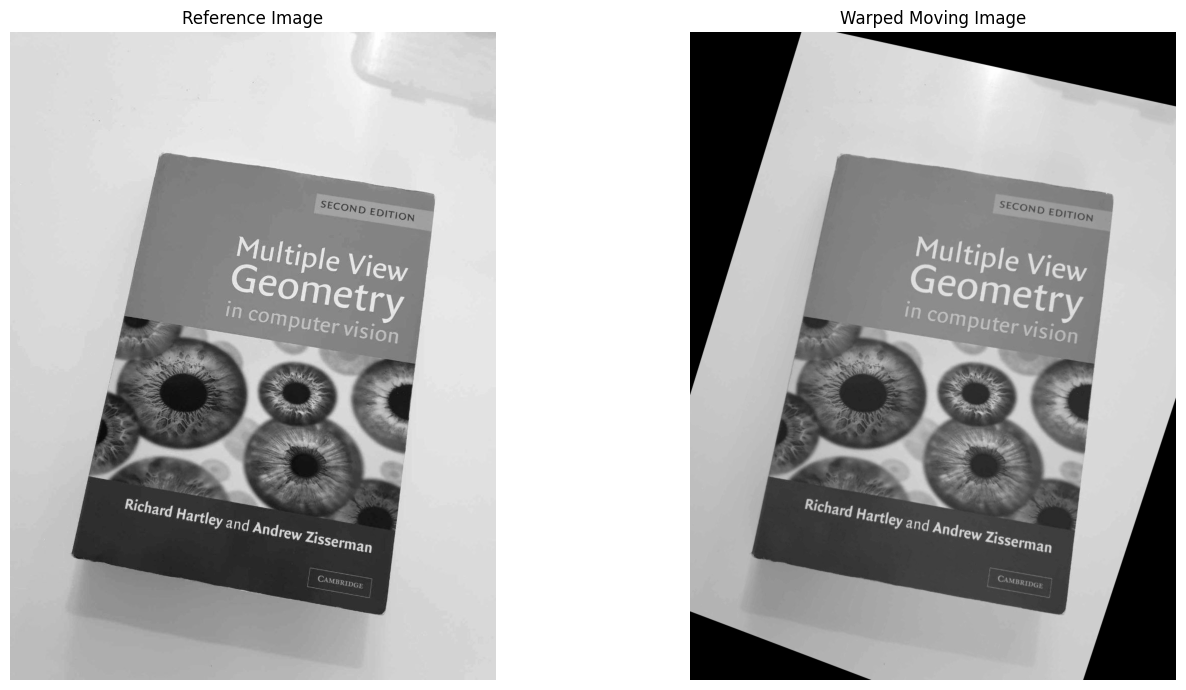

In [6]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
warpedImage, homography = findHomographyAndWarp(referenceImage, movingImage, keypoints1, keypoints2, matches)
height, width = referenceImage.shape
warpedImage = cv.warpPerspective(movingImage, homography, (width, height))
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(referenceImage, cmap='gray')
plt.title('Reference Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(warpedImage, cmap='gray')
plt.title('Warped Moving Image')
plt.axis('off')

plt.tight_layout()
plt.show()


## Inpainting the warped image to fill in missing values.

#### *This involves using the inpainting function to improve the visual quality of the warped image.*

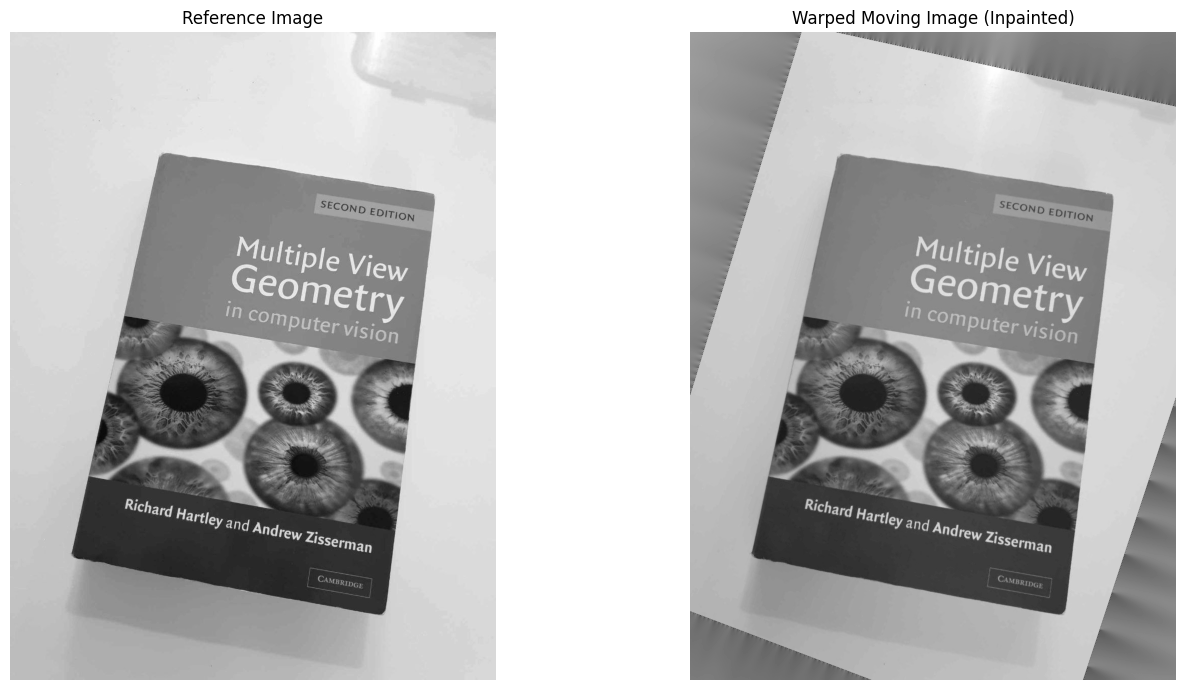

In [7]:
warpedImageInpainted = inpaintMissingValues(warpedImage)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(referenceImage, cmap='gray')
plt.title('Reference Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(warpedImageInpainted, cmap='gray')
plt.title('Warped Moving Image (Inpainted)')
plt.axis('off')

plt.tight_layout()
plt.show()

# *EXTRA PART*

## loading and displaying the RGB versions of the reference and moving images.
#### *This demonstrates the effect of color information in the registration process.*


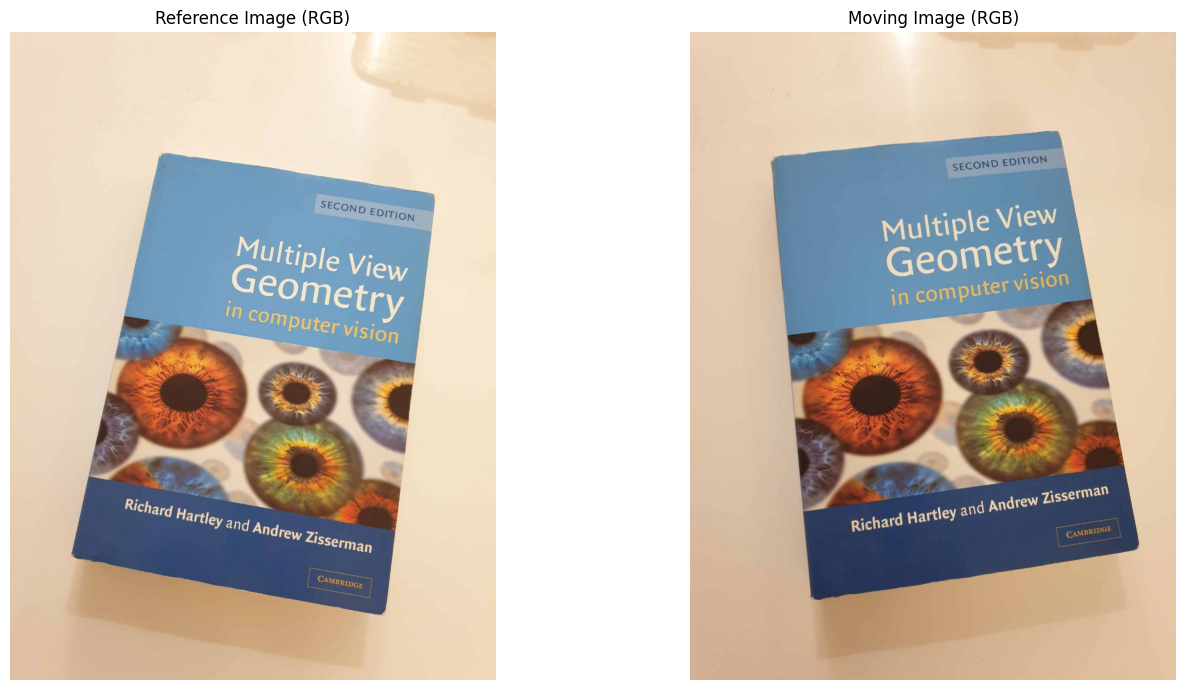

In [8]:
referenceImageRGB = cv.imread('book1.jpg')
movingImageRGB = cv.imread('book2.jpg')
referenceImageRGB = cv.cvtColor(referenceImageRGB, cv.COLOR_BGR2RGB)
movingImageRGB = cv.cvtColor(movingImageRGB, cv.COLOR_BGR2RGB)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(referenceImageRGB)
plt.title('Reference Image (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(movingImageRGB)
plt.title('Moving Image (RGB)')
plt.axis('off')

plt.tight_layout()
plt.show()


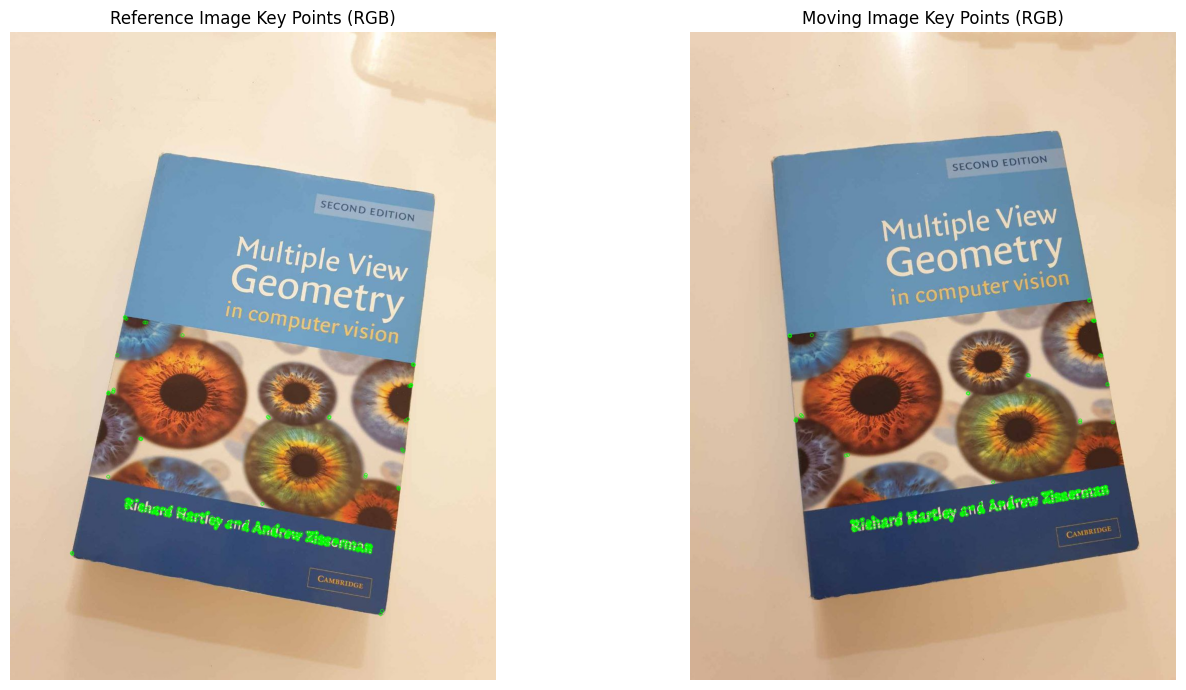

In [9]:
keypoints1RGB, descriptors1RGB = orb.detectAndCompute(referenceImageRGB, None)
keypoints2RGB, descriptors2RGB = orb.detectAndCompute(movingImageRGB, None)
referenceImageWithKeypointsRGB = cv.drawKeypoints(referenceImageRGB, keypoints1RGB, None, color=(0, 255, 0), flags=0)
movingImageWithKeypointsRGB = cv.drawKeypoints(movingImageRGB, keypoints2RGB, None, color=(0, 255, 0), flags=0)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(referenceImageWithKeypointsRGB)
plt.title('Reference Image Key Points (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(movingImageWithKeypointsRGB)
plt.title('Moving Image Key Points (RGB)')
plt.axis('off')

plt.tight_layout()
plt.show()


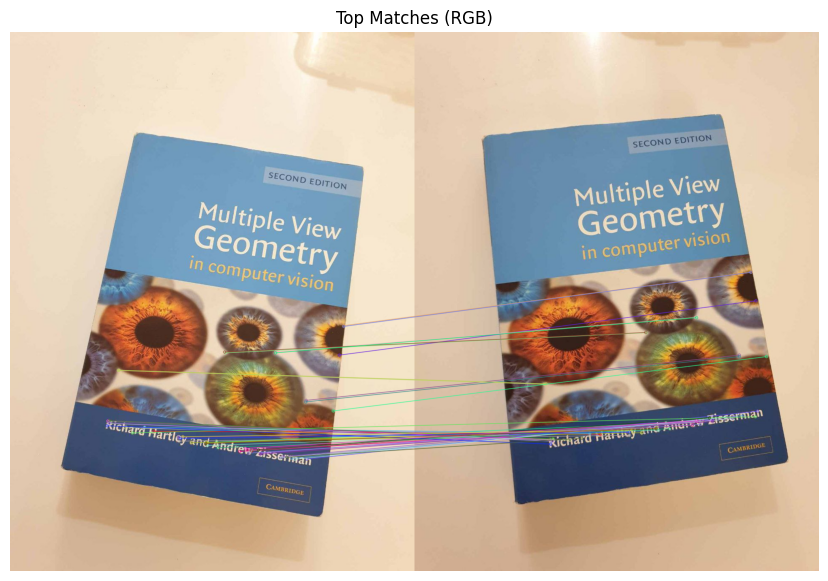

In [10]:
matchesRGB = bf.match(descriptors1RGB, descriptors2RGB)
matchesRGB = sorted(matchesRGB, key=lambda x: x.distance)
matchingResultRGB = cv.drawMatches(referenceImageRGB, keypoints1RGB, movingImageRGB, keypoints2RGB, matchesRGB[:numMatchesToDraw], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15, 7))
plt.imshow(matchingResultRGB)
plt.title('Top Matches (RGB)')
plt.axis('off')
plt.show()


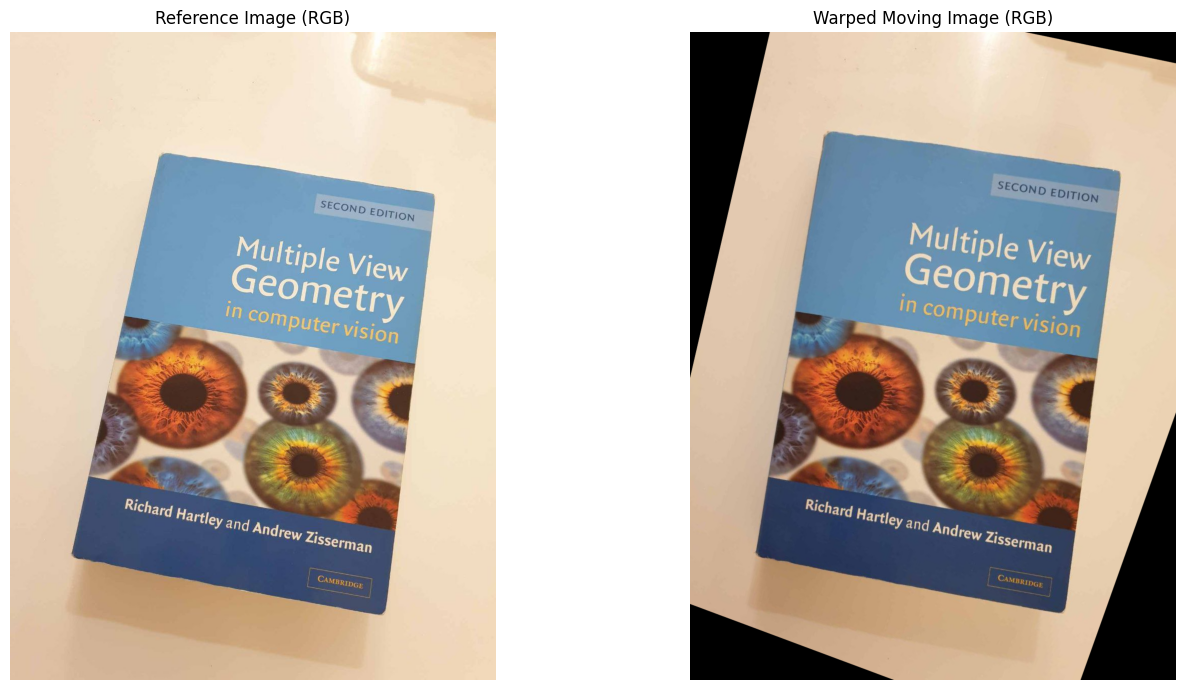

In [11]:
points1RGB = np.zeros((len(matchesRGB), 2), dtype=np.float32)
points2RGB = np.zeros((len(matchesRGB), 2), dtype=np.float32)
for i, match in enumerate(matchesRGB):
    points1RGB[i, :] = keypoints1RGB[match.queryIdx].pt
    points2RGB[i, :] = keypoints2RGB[match.trainIdx].pt
warpedImageRGB, homographyRGB = findHomographyAndWarp(referenceImageRGB, movingImageRGB, keypoints1RGB, keypoints2RGB, matchesRGB)
heightRGB, widthRGB, channels = referenceImageRGB.shape
warpedImageRGB = cv.warpPerspective(movingImageRGB, homographyRGB, (widthRGB, heightRGB))

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(referenceImageRGB)
plt.title('Reference Image (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(warpedImageRGB)
plt.title('Warped Moving Image (RGB)')
plt.axis('off')

plt.tight_layout()
plt.show()


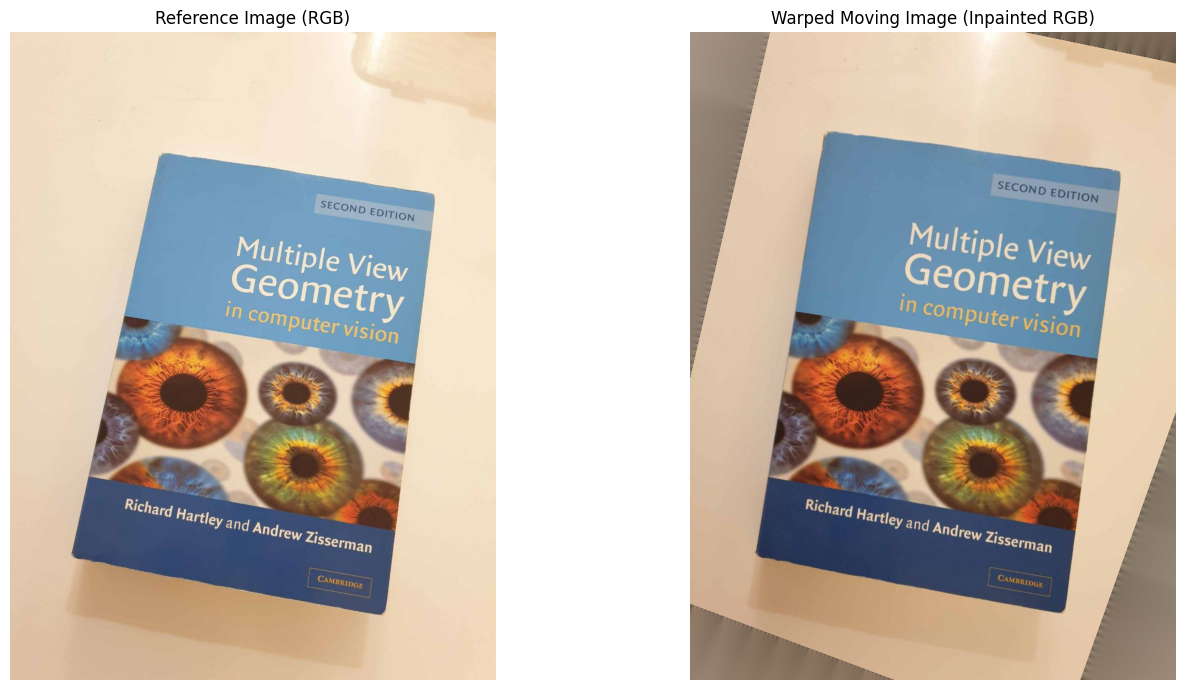

In [12]:
warpedImageRGBInpainted = inpaintMissingValues(warpedImageRGB)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(referenceImageRGB)
plt.title('Reference Image (RGB)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(warpedImageRGBInpainted)
plt.title('Warped Moving Image (Inpainted RGB)')
plt.axis('off')

plt.tight_layout()
plt.show()